In [1]:
import torch.nn as nn
import torch.nn.init as init


class SuperResolutionNet(nn.Module):
    def __init__(self, upscale_factor, inplace=False):
        super(SuperResolutionNet, self).__init__()

        self.relu = nn.ReLU(inplace=inplace)
        self.conv1 = nn.Conv2d(1, 64, (5, 5), (1, 1), (2, 2))
        self.conv2 = nn.Conv2d(64, 64, (3, 3), (1, 1), (1, 1))
        self.conv3 = nn.Conv2d(64, 32, (3, 3), (1, 1), (1, 1))
        self.conv4 = nn.Conv2d(32, upscale_factor ** 2, (3, 3), (1, 1), (1, 1))
        self.pixel_shuffle = nn.PixelShuffle(upscale_factor)

        self._initialize_weights()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pixel_shuffle(self.conv4(x))
        return x

    def _initialize_weights(self):
        init.orthogonal_(self.conv1.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv2.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv3.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv4.weight)

# Create the super-resolution model by using the above model definition.
torch_model = SuperResolutionNet(upscale_factor=3)

In [5]:
import torch
model_url = 'https://s3.amazonaws.com/pytorch/test_data/export/superres_epoch100-44c6958e.pth'
batch_size = 1    # just a random number
torch_model.load_state_dict(torch.load("C:\\Users\\Suraj\\Downloads\\superres_epoch100-44c6958e.pth"))

# set the model to inference mode
torch_model.eval()

SuperResolutionNet(
  (relu): ReLU()
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pixel_shuffle): PixelShuffle(upscale_factor=3)
)

In [73]:
from PIL import Image
img = Image.open("C:\\Users\\Suraj\\Downloads\\phone.jpg")

In [74]:
import torchvision.transforms as transforms
resize = transforms.Resize([224, 224])
img = resize(img)
img_ycbcr = img.convert('YCbCr')
print(img_ycbcr)
img_y, img_cb, img_cr = img_ycbcr.split()

to_tensor = transforms.ToTensor()
img_y = to_tensor(img_y)
img_y.unsqueeze_(0)

<PIL.Image.Image image mode=YCbCr size=224x224 at 0x1FCF363F190>


tensor([[[[0.1647, 0.1608, 0.1647,  ..., 0.1333, 0.1333, 0.1333],
          [0.1647, 0.1647, 0.1647,  ..., 0.1333, 0.1333, 0.1333],
          [0.1686, 0.1647, 0.1647,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1294, 0.1294, 0.1294,  ..., 0.1373, 0.1373, 0.1373],
          [0.1294, 0.1294, 0.1294,  ..., 0.1373, 0.1373, 0.1373],
          [0.1294, 0.1294, 0.1294,  ..., 0.1373, 0.1373, 0.1373]]]])

In [75]:
img_y.shape

torch.Size([1, 1, 224, 224])

In [76]:
out=torch_model(img_y)

In [77]:
out.shape

torch.Size([1, 1, 672, 672])

In [78]:
import numpy as np
out = out.cpu()
out_img_y = out[0].detach().numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img_cb = img_cb.resize(out_img_y.size, Image.BICUBIC)
out_img_cr = img_cr.resize(out_img_y.size, Image.BICUBIC)
out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')


# Save the image, we will compare this with the output image from mobile device
out_img.save("C:\\Users\\Suraj\\Downloads\\anupama1.jpg")

In [79]:
img1=np.asarray(out_img)
img1.shape

(672, 672, 3)

29.97002997002997
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(672, 672, 3)
(6

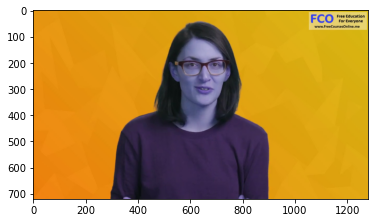

In [96]:
vidObj = cv2.VideoCapture("C:\\Users\\Suraj\\Downloads\\move.mp4.mp4") 
count = 0
success = 1
fps=vidObj.get(cv2.CAP_PROP_FPS)
print(fps)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out2 = cv2.VideoWriter('C:\\Users\\Suraj\\Downloads\\output.mp4', fourcc, 29.97002997002997 ,(672,672))
while success: 
  
        # vidObj object calls read 
        # function extract frames 
        success, image = vidObj.read() 
        #resize = transforms.Resize([224, 224])
        plt.imshow(image)
        #print(type(image))
        img = cv2.resize(image,(224,224))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
        #print(img_ycbcr)
        img = Image.fromarray(np.uint8(img)).convert('RGB')
        img= img.convert('YCbCr')
        img_y, img_cb, img_cr = img.split()

        to_tensor = transforms.ToTensor()
        img_y = to_tensor(img_y)
        img_y.unsqueeze_(0)
  
        # Saves the frames with frame-count 
        out=torch_model(img_y)
        import numpy as np
        out = out.cpu()
        out_img_y = out[0].detach().numpy()
        out_img_y *= 255.0
        out_img_y = out_img_y.clip(0, 255)
        out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

        out_img_cb = img_cb.resize(out_img_y.size, Image.BICUBIC)
        out_img_cr = img_cr.resize(out_img_y.size, Image.BICUBIC)
        out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')
        out_img= np.asarray(out_img)
        image=np.copy(out_img)
        print(image.shape)
        out2.write(image)
  
        count += 1
        if count==500:
            break
        
out2.release()            